<a href="https://colab.research.google.com/github/MiShaShim/MiShaShim.github.io/blob/main/Breast%20Cancer%20Prediction%20Using%20Machine%20Learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se 

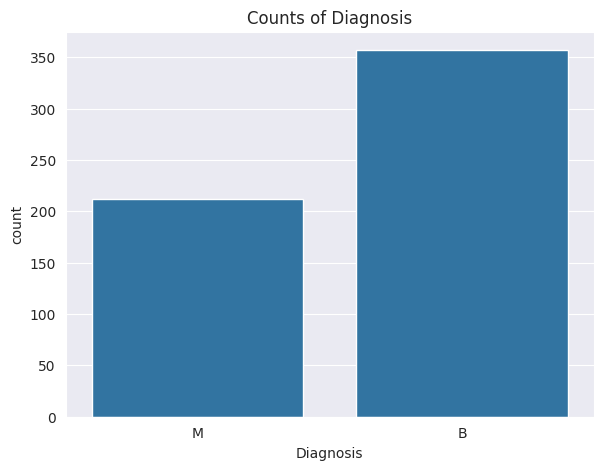

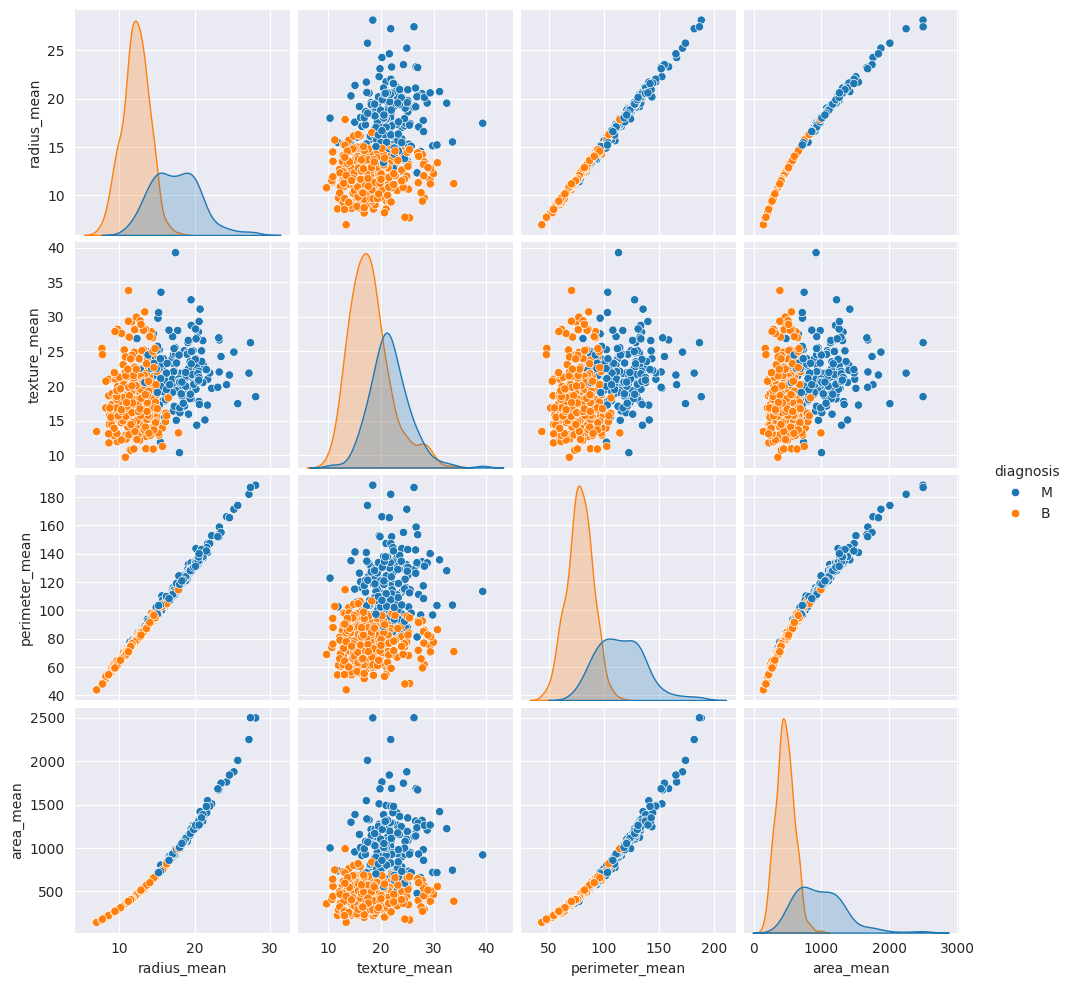

<ipython-input-1-9e4ac0d2628d>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['diagnosis'] = labelencoder_Y.fit_transform(data_cleaned['diagnosis'])


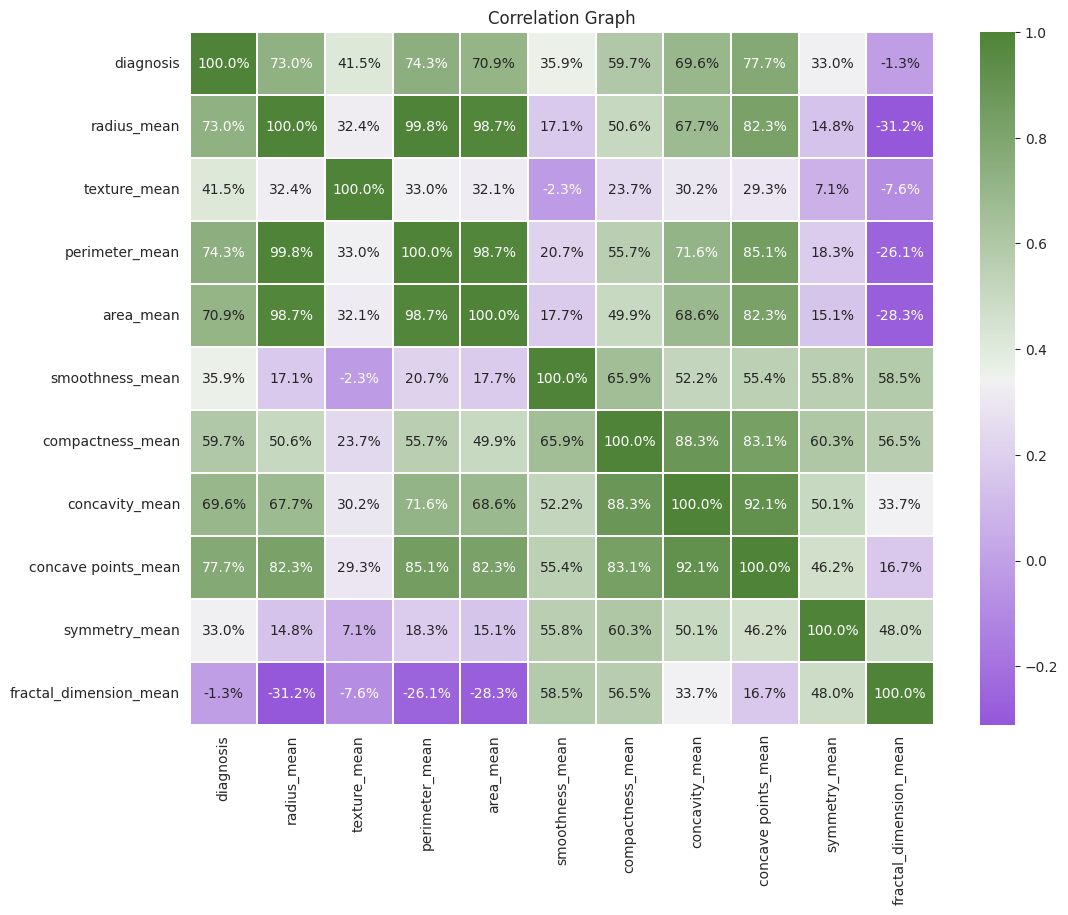


Model: LogisticRegression
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



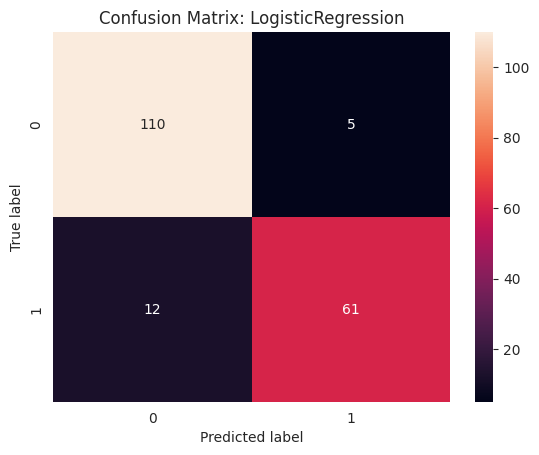


Model: DecisionTreeClassifier
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       115
           1       0.86      0.89      0.87        73

    accuracy                           0.90       188
   macro avg       0.89      0.90      0.89       188
weighted avg       0.90      0.90      0.90       188



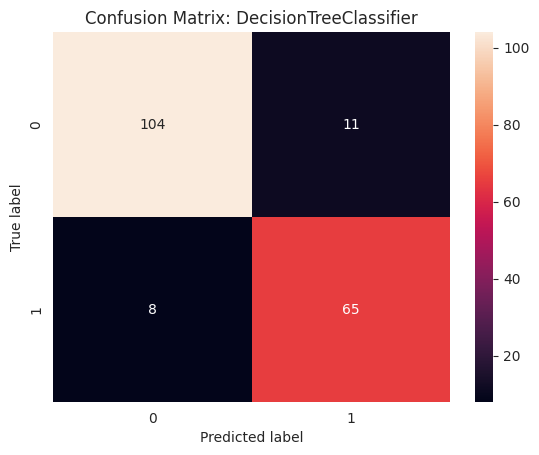


Model: RandomForestClassifier
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       115
           1       0.93      0.85      0.89        73

    accuracy                           0.91       188
   macro avg       0.92      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188



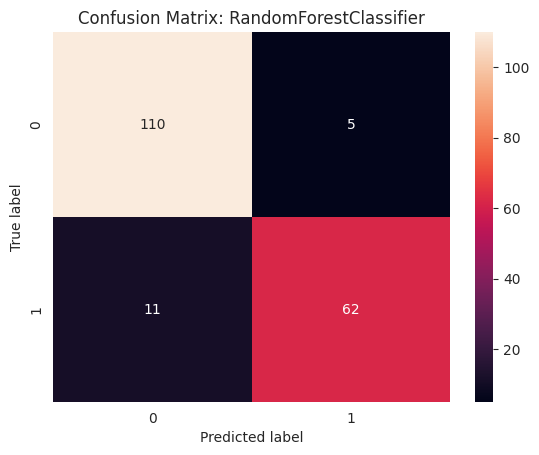


Model: SVC
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



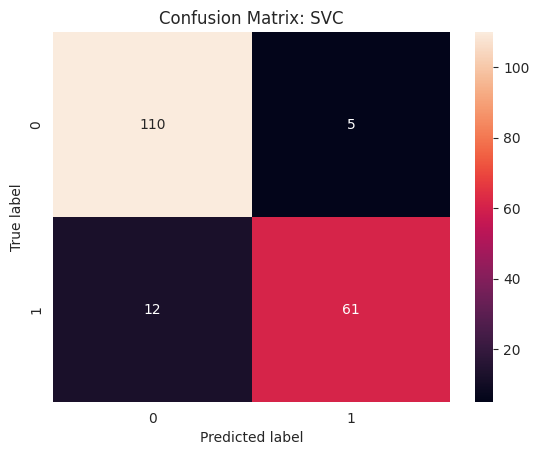


Model: KNeighborsClassifier
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       115
           1       0.90      0.88      0.89        73

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188



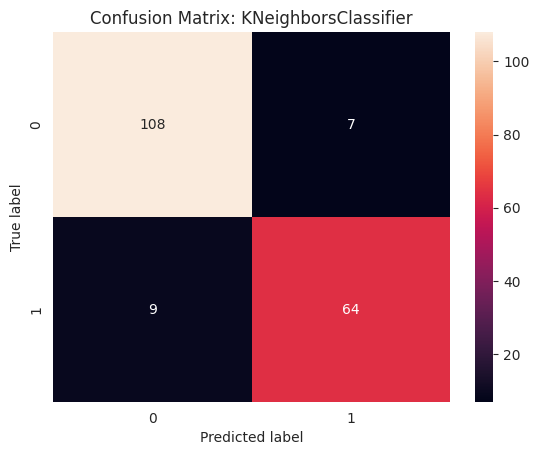

Loaded Model Accuracy: 0.91


In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

# Machine Learning libraries
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Set display options
pd.options.display.max_columns = 100
sns.set_style('darkgrid')

# Load data
data = pd.read_csv("/data.csv")

# Data Exploration and Preprocessing
print(data.shape)
print(data.head())
print(data.tail())
print(data.info())
print(data.isna().sum())

# Drop columns with missing values
data_cleaned = data.dropna(axis='columns')

# Data description and value counts
print(data_cleaned.describe(include="O"))
print(data_cleaned.diagnosis.value_counts())

# Visualizing data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='diagnosis', data=data_cleaned)
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")
plt.show()

# Pairplot for select features
select_cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
sns.pairplot(data_cleaned[select_cols], hue="diagnosis")
plt.show()

# Encode categorical data
labelencoder_Y = LabelEncoder()
data_cleaned['diagnosis'] = labelencoder_Y.fit_transform(data_cleaned['diagnosis'])

# Correlation matrix
corr_cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(12, 9))
sns.heatmap(data_cleaned[corr_cols].corr(), annot=True, fmt='.1%', linewidths=.05, cmap=sns.diverging_palette(1000, 120, as_cmap=True))
plt.title("Correlation Graph")
plt.show()

# ML Model Preparation
prediction_features = ["radius_mean", 'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
X = data_cleaned[prediction_features]
y = data_cleaned['diagnosis']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # Use transform here to avoid data leakage

# Model Selection and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"\nModel: {model.__class__.__name__}\nAccuracy: {accuracy:.2f}")
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

# Save and Load a Model Example
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
print(f"Loaded Model Accuracy: {loaded_model.score(X_test, y_test):.2f}")


Hyperparameter Tuning with GridSearchCV

In [2]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9186351706036745


Advanced Visualization with Plotly

In [3]:
import plotly.graph_objects as go

# Correlation matrix
corr_matrix = data_cleaned[corr_cols].corr()

# Interactive heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   hoverongaps=False))
fig.update_layout(title='Correlation Matrix', xaxis_title='Features', yaxis_title='Features')
fig.show()


Detailed Model Comparison

In [4]:
from sklearn.model_selection import cross_val_score

# Function to evaluate and compare models with cross-validation
def compare_models_cv(models, X, y, cv=5):
    model_scores = {}
    for model in models:
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        model_scores[model.__class__.__name__] = cv_scores
        print(f"{model.__class__.__name__}: Accuracy = {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")
    return model_scores

# List of models to compare
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

# Model comparison
model_scores = compare_models_cv(models, X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression: Accuracy = 0.89 (+/- 0.03)
DecisionTreeClassifier: Accuracy = 0.90 (+/- 0.03)
RandomForestClassifier: Accuracy = 0.92 (+/- 0.03)
SVC: Accuracy = 0.89 (+/- 0.05)
KNeighborsClassifier: Accuracy = 0.88 (+/- 0.04)


Custom Functionality

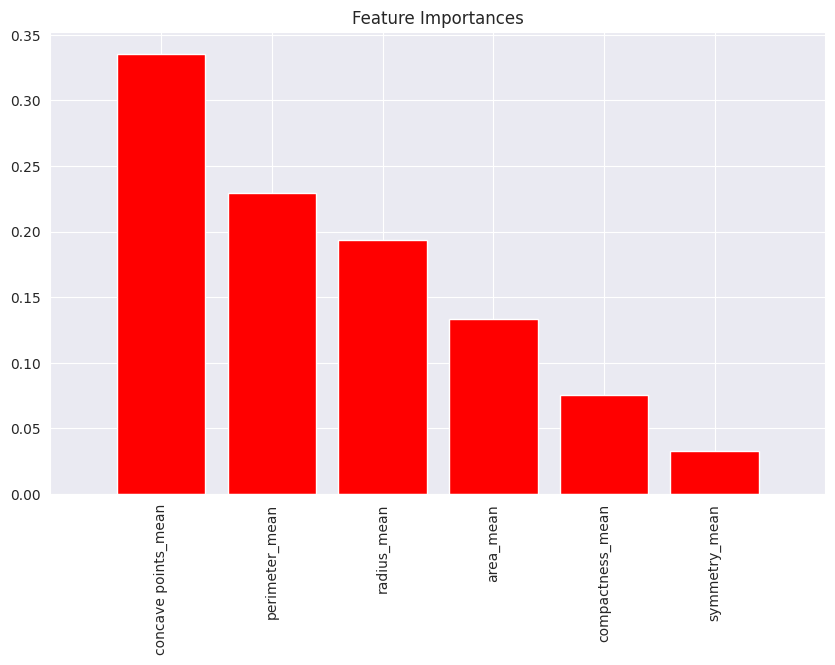

In [5]:
def plot_feature_importance(model, feature_names):
    feature_import = model.feature_importances_
    indices = np.argsort(feature_import)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), feature_import[indices],
            color="r", align="center")
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

# Assuming RandomForest is your final model and has been fitted
plot_feature_importance(grid_search.best_estimator_, prediction_features)


Feature Engineering and Selection

In [6]:
# Creating a new feature from existing data
data_cleaned['area_perimeter_ratio'] = data_cleaned['area_mean'] / data_cleaned['perimeter_mean']


In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = pd.DataFrame({'Feature':list(X.columns), 'Importance':fit.support_}).sort_values(by='Importance', ascending=False)
print(selected_features)


               Feature  Importance
0          radius_mean        True
1       perimeter_mean        True
2            area_mean        True
4     compactness_mean        True
5  concave points_mean        True
3        symmetry_mean       False


Model Ensemble and Stacking

In [8]:
from sklearn.ensemble import VotingClassifier

# Create the sub-models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svc', SVC(probability=True)),
    ('logreg', LogisticRegression())
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
ensemble_score = ensemble.score(X_test, y_test)
print(f'Ensemble model accuracy: {ensemble_score}')


Ensemble model accuracy: 0.9095744680851063


Model Deployment

In [9]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
model = pickle.load(open('final_model.sav', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([list(data.values())])
    output = prediction[0]
    return jsonify(output)

if __name__ == '__main__':
    app.run(port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
# Assuming you have a prediction model for loan approval
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Wrap your test dataset into BinaryLabelDataset
bld_test = BinaryLabelDataset(df=X_test, label_names=['loan_approved'], protected_attribute_names=['race', 'gender'])

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(bld_test, unprivileged_groups=[{'race': 0}], privileged_groups=[{'race': 1}])
print("Disparate impact:", metric.disparate_impact())
